In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('data.csv')

X = data[['WordPercent', 'LetterPercent', 'Rep']]
y = data[['1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries (X)']]  # Assuming these are the column names for bins

eerie_input = pd.DataFrame({
    'WordPercent': [0.00023],
    'LetterPercent': [0.418799],
    'Rep': [1.5]
})

# Define the Random Forest regressor
rf = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model with the entire dataset
grid_search.fit(X, y)

best_params = grid_search.best_params_

#Train a model with the best parameters on the entire dataset
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X, y)

eerie_prediction = best_rf.predict(eerie_input)

print("Predicted Distribution for 'eerie' on March 1st, 2023:")
print(eerie_prediction)


Predicted Distribution for 'eerie' on March 1st, 2023:
[[ 0.04813496  1.1282477   8.28644009 25.92713478 32.53251997 24.48251175
   7.72445081]]


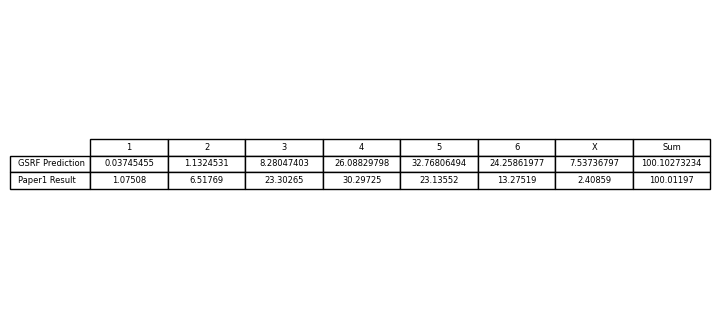

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

predicted_distribution = [0.03745455, 1.1324531, 8.28047403, 26.08829798, 32.76806494, 24.25861977, 7.53736797]
expected_distribution = [1.07508, 6.51769, 23.30265, 30.29725, 23.13552, 13.27519, 2.40859]

data = pd.DataFrame({
    '1': [predicted_distribution[0], expected_distribution[0]],
    '2': [predicted_distribution[1], expected_distribution[1]],
    '3': [predicted_distribution[2], expected_distribution[2]],
    '4': [predicted_distribution[3], expected_distribution[3]],
    '5': [predicted_distribution[4], expected_distribution[4]],
    '6': [predicted_distribution[5], expected_distribution[5]],
    'X': [predicted_distribution[6], expected_distribution[6]],
    'Sum': [sum(predicted_distribution), sum(expected_distribution)]
}, index=['GSRF Prediction', 'Paper1 Result'])

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data.values,
         colLabels=data.columns,
         rowLabels=data.index,
         cellLoc='center',
         loc='center')
plt.show()


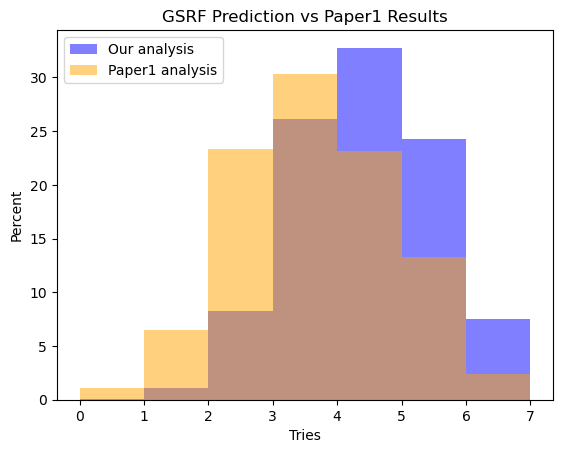

In [48]:
import matplotlib.pyplot as plt
import numpy as np

predicted_distribution = [0.03745455, 1.1324531, 8.28047403, 26.08829798, 32.76806494, 24.25861977, 7.53736797]
expected_distribution = [1.07508, 6.51769, 23.30265, 30.29725, 23.13552, 13.27519, 2.40859]

num_bins = len(predicted_distribution)
bin_edges = np.arange(num_bins + 1)

plt.hist(bin_edges[:-1], bin_edges, weights=predicted_distribution, alpha=0.5, label='Our analysis', color='blue')
plt.hist(bin_edges[:-1], bin_edges, weights=expected_distribution, alpha=0.5, label='Paper1 analysis', color='orange')

plt.xlabel('Tries')
plt.ylabel('Percent')
plt.title('GSRF Prediction vs Paper1 Results')
plt.legend()


plt.show()


In [49]:

plt.savefig('GSRF_Prediction_vs_Paper1_Results.jpg', format='jpeg')

<Figure size 640x480 with 0 Axes>

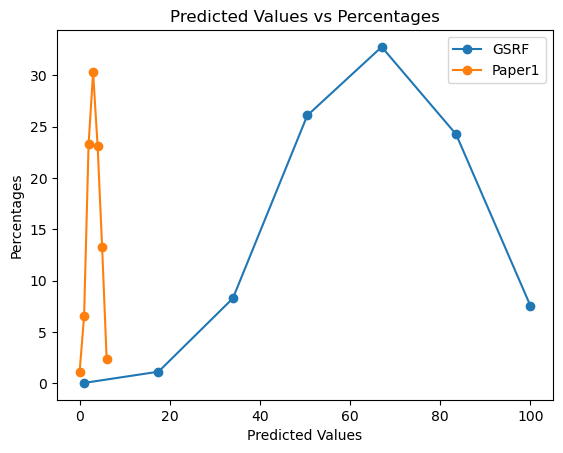

In [61]:

percentages = np.linspace(1, 100, len(predicted_distribution))

# Plotting
plt.plot(percentages,predicted_distribution,expected_distribution, marker='o', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Percentages')
plt.title('Predicted Values vs Percentages')
plt.legend(labels=['GSRF','Paper1'])
# Show the plot
plt.show()
